In [177]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import k_means, dbscan
from functools import partial
import cufflinks as cf

iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# apply standard scaler
df = (df - df.mean()) / df.std()
df['class'] = iris.target_names[iris.target]

# k-means from scratch

In [161]:
k = 3   # number of clusters
m = 4   # number of columns

# randomly assign first centers
CENTROIDS = np.random.random((k, m))

def assign_to_cluster(point):
    "Find nearest centroid index"
    return np.sum((CENTROIDS - list(point))**2, axis=1).argmin()

for _ in range(100):
    # find nearest centroid for each point
    df['cluster'] = df.iloc[:, :m].apply(assign_to_cluster, axis=1)
    # update centroids using means
    CENTROIDS = df.groupby('cluster').mean().values

In [162]:
df.iplot(x='sepal length (cm)', y='petal length (cm)', categories='cluster',
         title='k-means generated clusters with k=3')

In [163]:
df.iplot(x='sepal length (cm)', y='petal length (cm)', categories='class',
         title='Actual iris class')

Not bad, we were able to find cluster which closely match actual result. Can you think of more use-cases for k-means?

## How to determine number of clusters k?

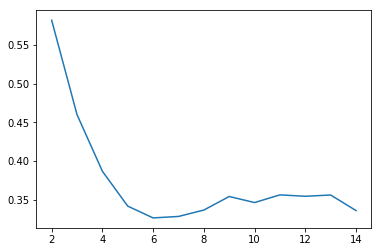

In [187]:
from sklearn.metrics import silhouette_score

L = [None, None]
for k in range(2, 15):
    centroids, clusters, i = k_means(df.iloc[:,:4], n_clusters=k)
    L.append(silhouette_score(df.iloc[:,:4], clusters))

plt.plot(L)

## Where k-means fails?

In [199]:
n = 1000
inner = np.random.normal(size=(n, 2)) / 5
outer = np.random.uniform(size=(n)) * 2 * np.pi
outer = np.array(list(map(lambda x: [np.cos(x) + np.random.normal() * 0.05,
                                     np.sin(x) + np.random.normal() * 0.05], outer)))
df = pd.DataFrame(np.vstack([inner, outer]), columns=['x', 'y'])

df.iplot(kind='scatter', mode='markers', x='x', y='y')

In [200]:
centroids, df['cluster'], _ = k_means(df, n_clusters=2)
df.iplot(kind='scatter', mode='markers', x='x', y='y', categories='cluster')

Can you explain why this result looks like that?

# DBSCAN

Since DBSCAN is "grown" it might solve this problem, let's try it out.

In [220]:
_, df['cluster'] = dbscan(df.iloc[:, :2], eps=0.1)
df.iplot(kind='scatter', mode='markers', x='x', y='y', categories='cluster')

Can you answer what are the blue (-1) points?